<b>Universal Function Approximation from http://deliprao.com/archives/100</b>

by Delip on November 13, 2015 in Deep Learning, Machine Learning

<i>A multilayered neural network with even a single hidden layer can learn any function. This universal function approximation property of multilayer perceptrons was first noted by Cybenko (1989) and Hornik (1991). In this post, I will use TensorFlow to implement a multilayer neural network (also known as a multilayer perceptron) to learn arbitrary Python lambda expressions.</i>

Translated into PyTorch from TensorFlow

In [26]:
%matplotlib inline

import numpy as np
import math, random
import matplotlib.pyplot as plt

from utils import *

In [49]:
np.random.seed(1000) # for repro

NUM_HIDDEN_NODES = 20
NUM_EXAMPLES = 1000
TRAIN_SPLIT = .8
NUM_EPOCHS = 5000

In [50]:
function_to_learn = lambda x: np.sin(x) + 0.1*np.random.randn(*x.shape)

In [51]:
all_x = np.float32(np.random.uniform(-2*math.pi, 2*math.pi, (1, NUM_EXAMPLES))).T

np.random.shuffle(all_x)

train_size = int(NUM_EXAMPLES*TRAIN_SPLIT)

trainx = all_x[:train_size]
trainy = function_to_learn(trainx)

testx = all_x[train_size:]
testy = function_to_learn(validx)

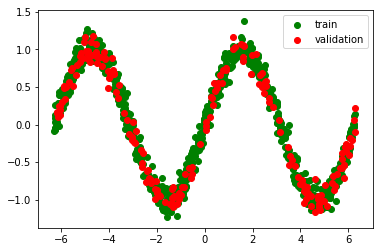

In [52]:
plt.figure(1)
plt.scatter(trainx, trainy, c='green', label='train')
plt.scatter(testx, testy, c='red', label='validation')
plt.legend()

In [53]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
# from (https://github.com/jcjohnson/pytorch-examples)
N, D_in, H, D_out = NUM_EXAMPLES, 1, NUM_HIDDEN_NODES, 1

In [54]:
import torch
from torch.autograd import Variable
import torch.nn.init as init
import torch.nn.functional as F

dtype = torch.FloatTensor

In [55]:
class Net(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.w1 = torch.nn.Linear(D_in, H)
        self.w2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        h_relu = F.tanh(self.w1(x).clamp(min=0))
        y_pred = self.w2(h_relu)
        return y_pred

In [56]:
x = Variable(torch.FloatTensor(trainx))
y = Variable(torch.FloatTensor(trainy))

In [57]:
model = Net(D_in, H, D_out)
glorot_weight_zero_bias(model)

criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

for t in range(NUM_EPOCHS):
    
    optimizer.zero_grad()

    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
        
print(t, loss.item())

4999 63.80385208129883


In [58]:
x = Variable(torch.FloatTensor(testx))
y = Variable(torch.FloatTensor(testy))
y_pred = model(x)

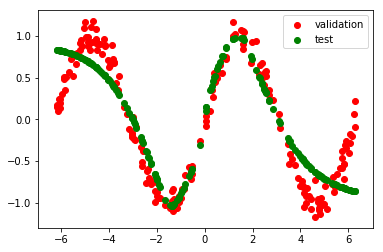

In [59]:
plt.figure(1)
plt.scatter(validx, validy, c='red', label='validation')
plt.scatter(validx, y_pred.data.numpy(), c='green', label='test')
plt.legend()